In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Loading the csv file
df1=pd.read_csv('Southern.csv')
# creating dataframe
city_1=pd.DataFrame(df1)
df2=pd.read_csv('Evreux.csv')
city_2=pd.DataFrame(df2)
df3=pd.read_csv('Narberth.csv')
city_3=pd.DataFrame(df3)
df4=pd.read_csv('Szczecin.csv')
city_4=pd.DataFrame(df4)
df5=pd.read_csv('Manchester.csv')
city_5=pd.DataFrame(df5)
df6=pd.read_csv('Lalanea.csv')
city_6=pd.DataFrame(df6)

#Concatinating the six cities and creating single dataframe
all_city=pd.concat([city_1,city_2,city_3,city_4,city_5,city_6],ignore_index=True)


In [95]:
#Droping unnecessary columns
#all_city.drop('location_id'',axis=1)
#all_city.drop('latitude',axis=1)
#all_city.drop('longitude',axis=1)
#all_city.drop('country_iso',axis=1)
#all_city.drop('ismobile',axis=1)
#all_city.drop('provider',axis=1)
            

#Displaying the first 10 rows
print(all_city.head(10))

#displaying the last 10 rows
print(all_city.tail(10))

#Identifying missing values
print(all_city.info())

# Droping missing values of the records 
all_city=all_city.dropna(axis=0)

  location_name  pm25  pm25AQI  pm10  pm10AQI     o3  o3AQI  \
0      Southern  36.0      103  62.0       55  120.0    209   
1      Southern  36.0      103  60.0       54  120.0    209   
2      Southern  40.0      113  64.0       56  120.0    209   
3      Southern  41.0      115  65.0       57  130.0    214   
4      Southern  39.0      110  62.0       55  140.0    219   
5      Southern  37.0      105  61.0       55  160.0    230   
6      Southern  36.0      103  64.0       56  160.0    230   
7      Southern  39.0      110  68.0       58  160.0    230   
8      Southern  40.0      113  70.0       59  160.0    230   
9      Southern  40.0      113  70.0       59  160.0    230   

                 datetimeUtc  
0  2024-01-01T01:00:00+00:00  
1  2024-01-01T02:00:00+00:00  
2  2024-01-01T03:00:00+00:00  
3  2024-01-01T04:00:00+00:00  
4  2024-01-01T05:00:00+00:00  
5  2024-01-01T06:00:00+00:00  
6  2024-01-01T07:00:00+00:00  
7  2024-01-01T08:00:00+00:00  
8  2024-01-01T09:00:00+00:0

In [96]:
#Identifying duplicate entries
print(all_city.duplicated())

#Removing the duplicated rows
all_city=all_city.drop_duplicates()

0       False
1       False
2       False
3       False
4       False
        ...  
3861    False
3862    False
3863    False
3864    False
3865    False
Length: 3862, dtype: bool


In [97]:
# Calculating AQI for all cities
all_city['AQI'] = all_city[['pm25AQI','pm10AQI','o3AQI']].max(axis=1)
# changing the date to datetime
all_city['Date']=pd.to_datetime(all_city['datetimeUtc'])
print(all_city.head())
#Calculating summary of statistics
print(all_city.describe())

  location_name  pm25  pm25AQI  pm10  pm10AQI     o3  o3AQI  \
0      Southern  36.0      103  62.0       55  120.0    209   
1      Southern  36.0      103  60.0       54  120.0    209   
2      Southern  40.0      113  64.0       56  120.0    209   
3      Southern  41.0      115  65.0       57  130.0    214   
4      Southern  39.0      110  62.0       55  140.0    219   

                 datetimeUtc  AQI                      Date  
0  2024-01-01T01:00:00+00:00  209 2024-01-01 01:00:00+00:00  
1  2024-01-01T02:00:00+00:00  209 2024-01-01 02:00:00+00:00  
2  2024-01-01T03:00:00+00:00  209 2024-01-01 03:00:00+00:00  
3  2024-01-01T04:00:00+00:00  214 2024-01-01 04:00:00+00:00  
4  2024-01-01T05:00:00+00:00  219 2024-01-01 05:00:00+00:00  
              pm25      pm25AQI         pm10      pm10AQI           o3  \
count  3862.000000  3862.000000  3862.000000  3862.000000  3862.000000   
mean     12.624780    45.489125    19.655412    18.488089    55.064008   
std      10.784184    26.51

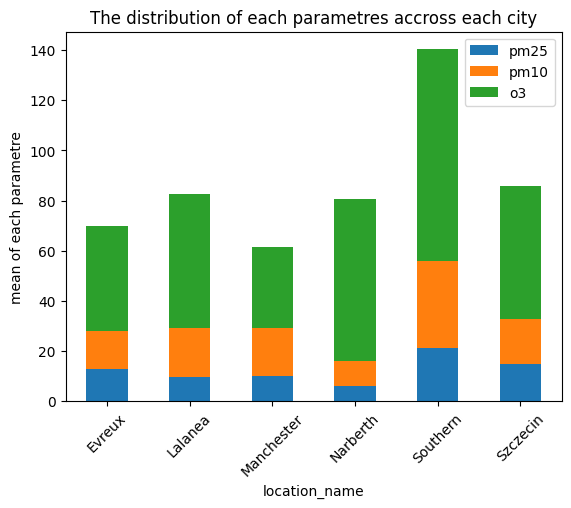

In [98]:
# Exploring the distribution of parameteres
#Bar graph for the mean of concentration for each parametre in each city after grouping by city
barp=all_city.groupby('location_name').agg({'pm25':'mean','pm10':'mean','o3':'mean'}) # the agg() function will help us to be in dataframe format
barp.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('mean of each parametre')
plt.title('The distribution of each parametres accross each city')
plt.show()

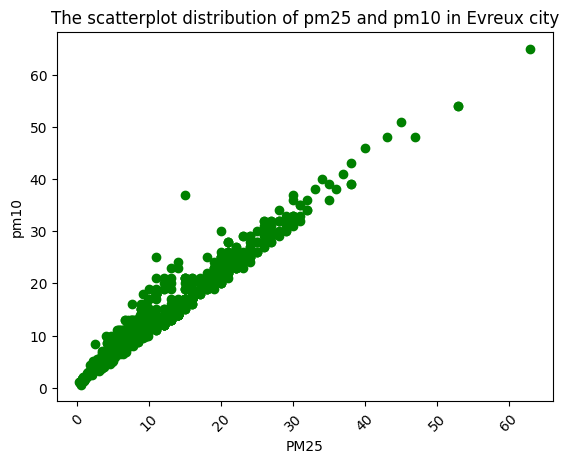

<Figure size 1000x600 with 0 Axes>

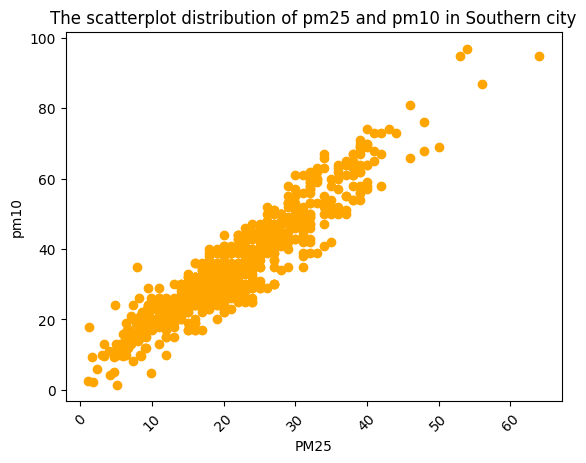

<Figure size 1000x600 with 0 Axes>

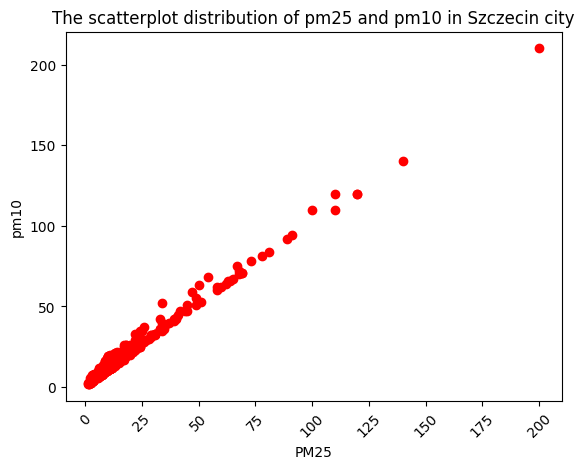

<Figure size 1000x600 with 0 Axes>

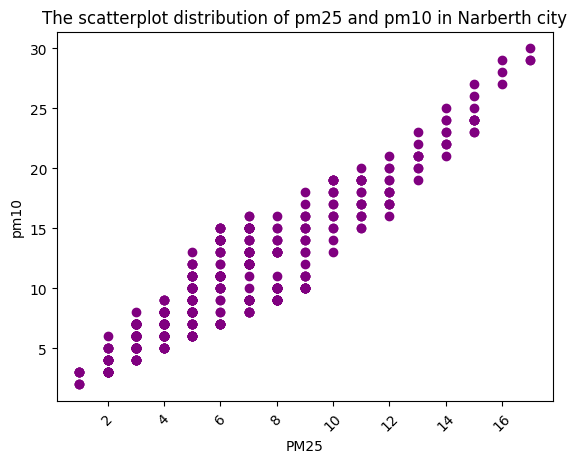

<Figure size 1000x600 with 0 Axes>

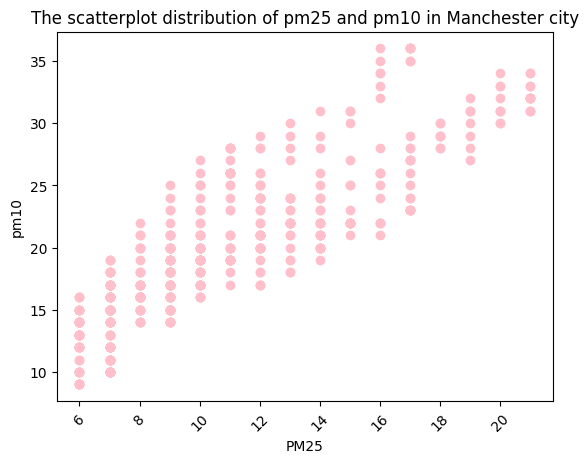

<Figure size 1000x600 with 0 Axes>

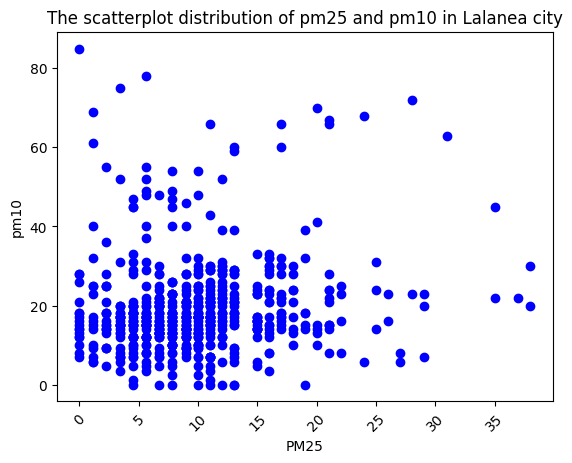

<Figure size 1000x600 with 0 Axes>

In [114]:
# The scatter plot of pm25 and pm10 concentration correlation across eacjh city
city=['Evreux','Southern','Szczecin', 'Narberth','Manchester','Lalanea']
color=['green','orange','red','purple','pink','blue']
for city,color in zip(city,color):
        scatplt=all_city[all_city['location_name']==city]
        plt.scatter(x=scatplt['pm25'],y=scatplt['pm10'],color=color)
        plt.xlabel('PM25')
        plt.ylabel('pm10')
        plt.title('The scatterplot distribution of pm25 and pm10 in {} city'.format(city))
        plt.xticks(rotation=45)
        plt.figure(figsize=(10, 6))
        plt.show()

Axes(0.125,0.11;0.775x0.77)


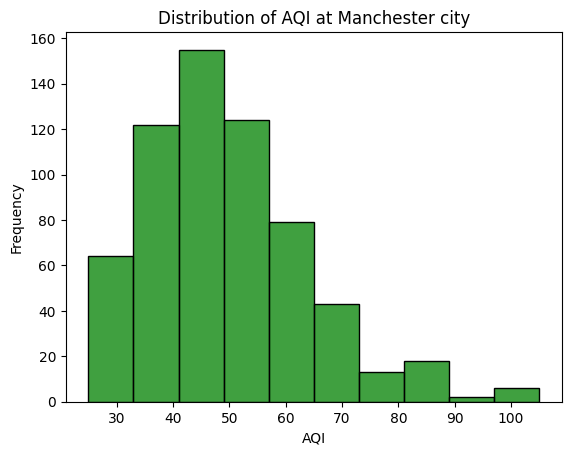

Axes(0.125,0.11;0.775x0.77)


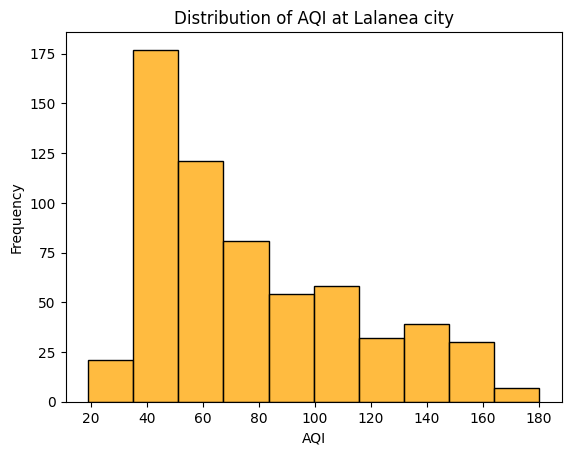

Axes(0.125,0.11;0.775x0.77)


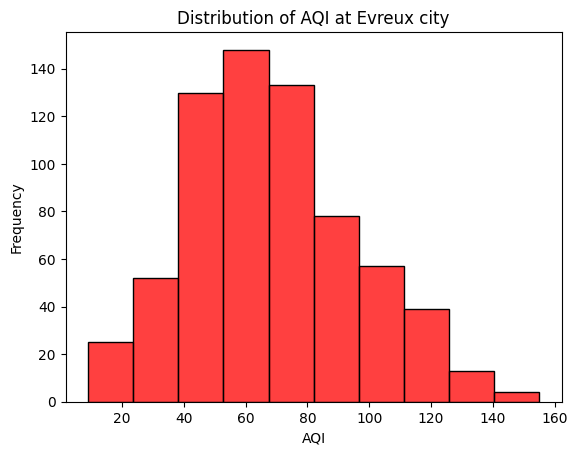

Axes(0.125,0.11;0.775x0.77)


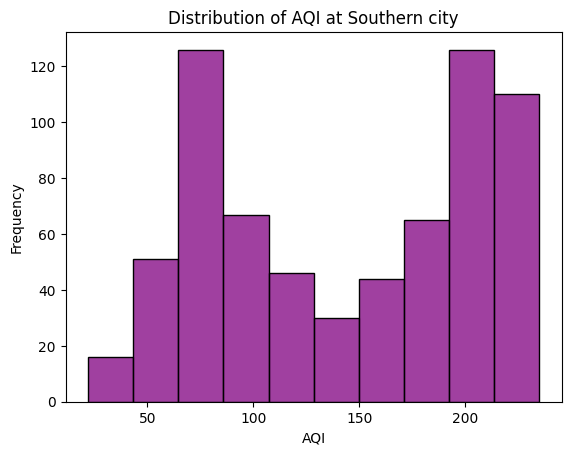

Axes(0.125,0.11;0.775x0.77)


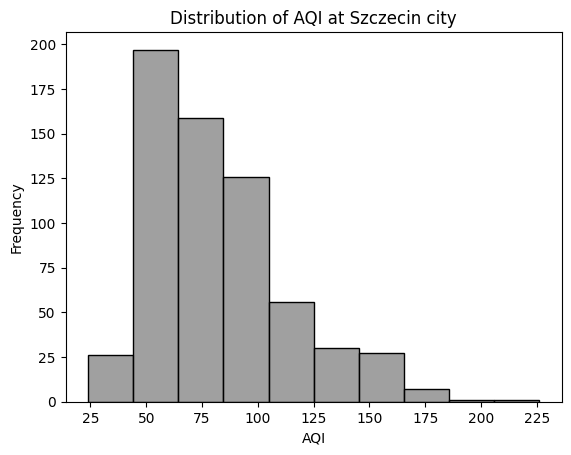

Axes(0.125,0.11;0.775x0.77)


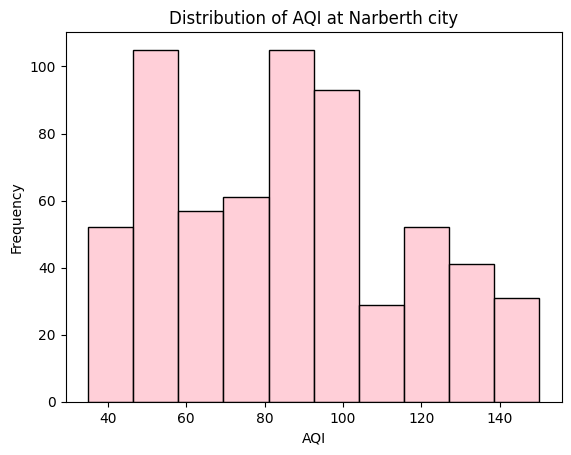

In [99]:
# Creating list of cities for draw histogram using for loop with different color to see the distribution of AQI across cities
#list of cities
city=['Manchester','Lalanea','Evreux','Southern','Szczecin', 'Narberth']
#list of colors for each draw
color=['green','orange','red','purple','gray','pink']
for city,color in zip(city,color): #the zip() function helps us to iterate with multiple variables and lists
    plt.figure() # this inner plot will figure each city with different graph 
    histogram=all_city[all_city['location_name']==city]['AQI']
    print(sns.histplot(histogram,bins=10,edgecolor='black',color=color))
    plt.xlabel('AQI')
    plt.ylabel('Frequency')
    plt.title('Distribution of AQI at {} city'.format(city)) # passing each city to the title 
    plt.show()

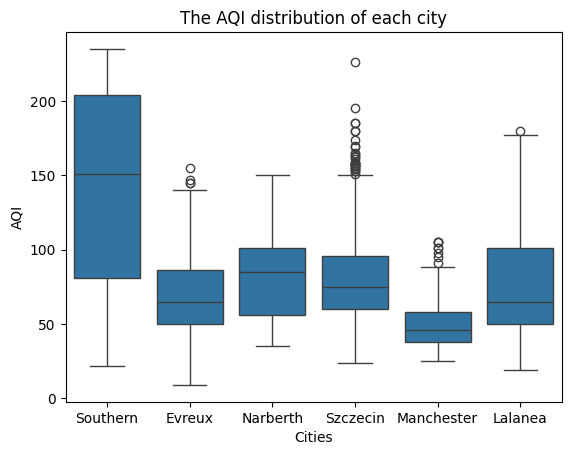

In [100]:
#Box plot for the distribution of AQI for each city using seaborn for better visualiation
sns.boxplot(x=all_city['location_name'],y=all_city['AQI']) #After grouping by cities it shows AQI distribution
plt.xlabel('Cities')
plt.ylabel('AQI')
plt.title("The AQI distribution of each city")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\3773893076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Date'] = ts['Date'].apply(pd.to_datetime).dt.date


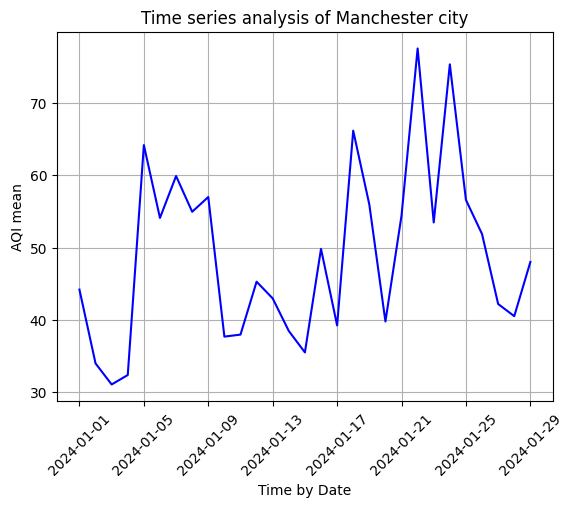

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\3773893076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Date'] = ts['Date'].apply(pd.to_datetime).dt.date


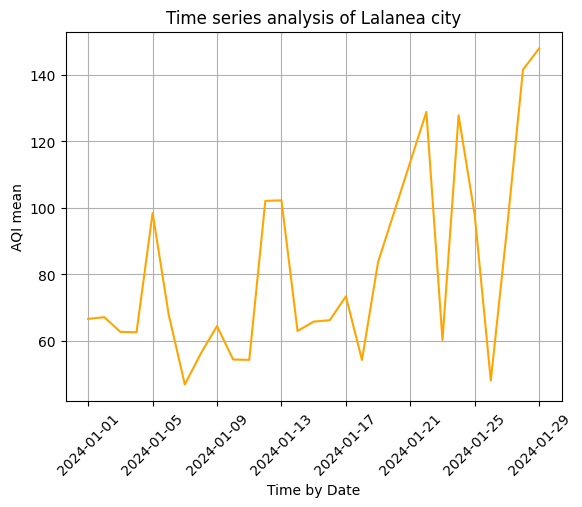

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\3773893076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Date'] = ts['Date'].apply(pd.to_datetime).dt.date


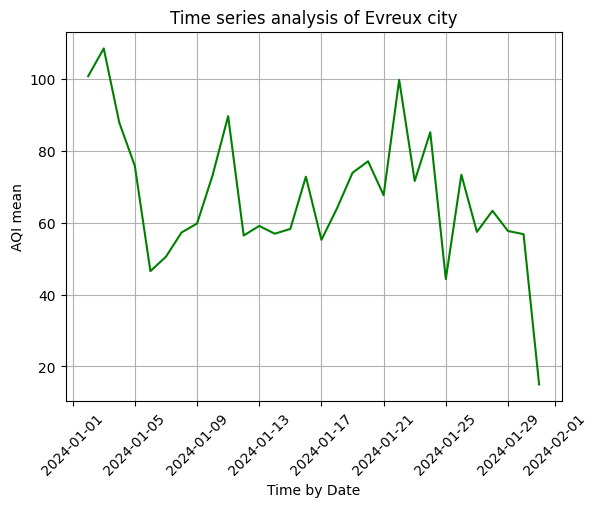

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\3773893076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Date'] = ts['Date'].apply(pd.to_datetime).dt.date


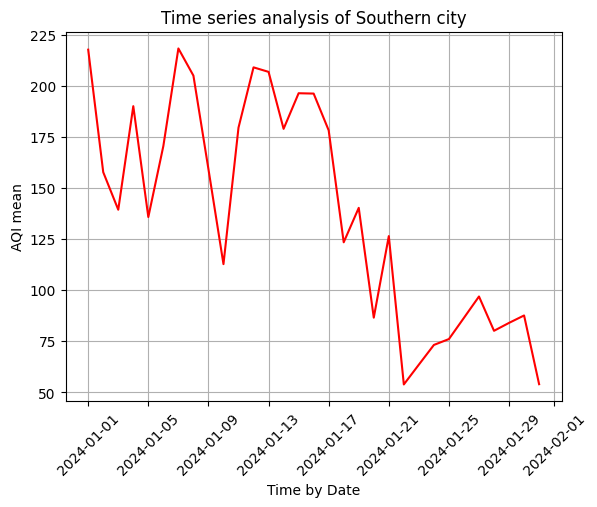

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\3773893076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Date'] = ts['Date'].apply(pd.to_datetime).dt.date


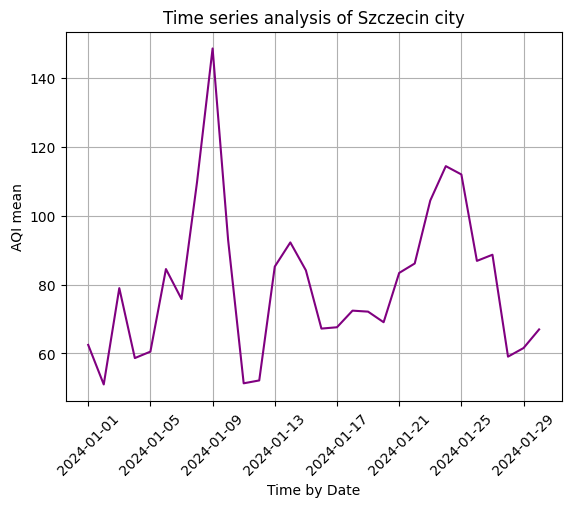

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\3773893076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Date'] = ts['Date'].apply(pd.to_datetime).dt.date


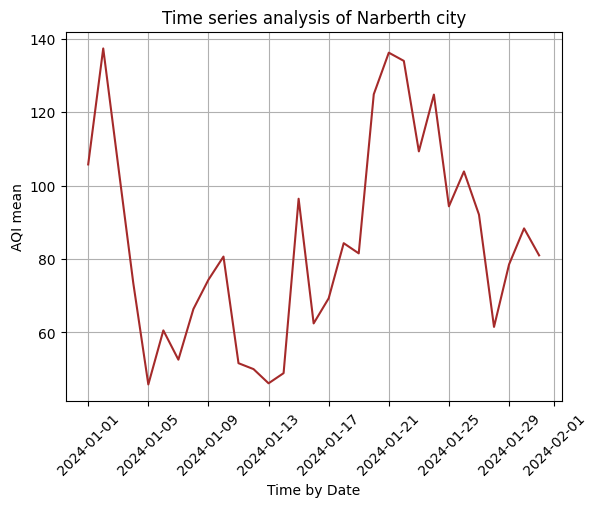

In [102]:
# The list of cities
city=['Manchester','Lalanea','Evreux','Southern','Szczecin', 'Narberth']
# The list of colors for cities
color = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Time Series plot of AQI mean of each day in each city
for city,color in zip(city,color):
    ts=all_city[all_city['location_name']==city]
    ts['Date'] = ts['Date'].apply(pd.to_datetime).dt.date
    result=ts.groupby('Date')['AQI'].mean().reset_index() # Grouping the mean AQI by date
    plt.plot(result['Date'],result['AQI'],color=color)
    plt.xticks(rotation=45)
    plt.xlabel('Time by Date')
    plt.ylabel("AQI mean")
    plt.title("Time series analysis of {} city".format(city)) # displaying each city in the title
    plt.grid(True)
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\381518900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Date'] = time_series['Date'].dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\381518900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Date'] = time_series['Date'].dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_19712\381518900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

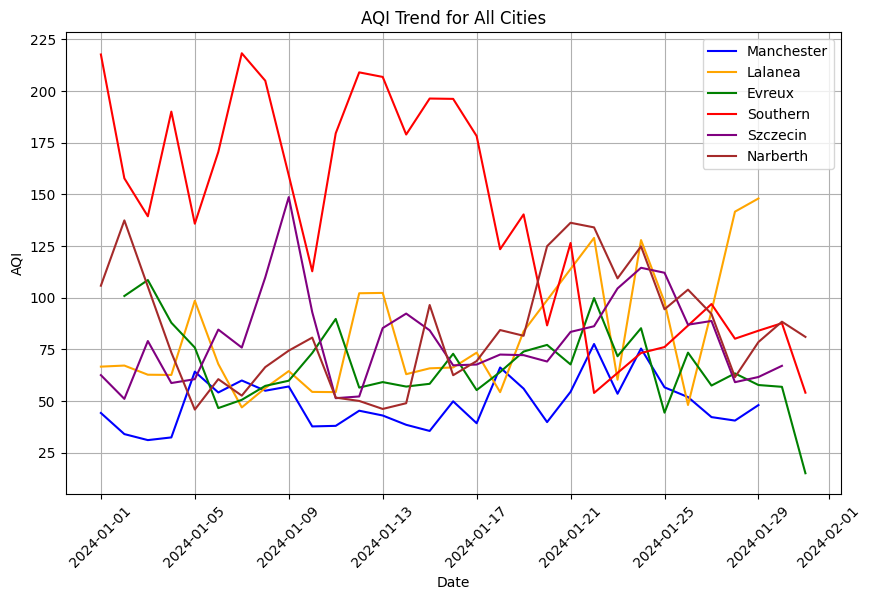

In [107]:
#List of cities
city=['Manchester','Lalanea','Evreux','Southern','Szczecin', 'Narberth']
# Define colors for each city
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown'] 

# The plot is outside of forloop so it will plot all cities time series analysis in one figure
plt.figure(figsize=(10, 6))
for city, color in zip(city, colors):
    time_series = all_city[all_city['location_name'] == city]
    time_series['Date'] = time_series['Date'].dt.date # changing to date 
    
    result= time_series.groupby('Date')['AQI'].mean().reset_index()
    plt.plot(result['Date'], result['AQI'], label=city, color=color)  # Plot with specified color
    
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trend for All Cities')
plt.grid(True)
plt.legend()
plt.show()

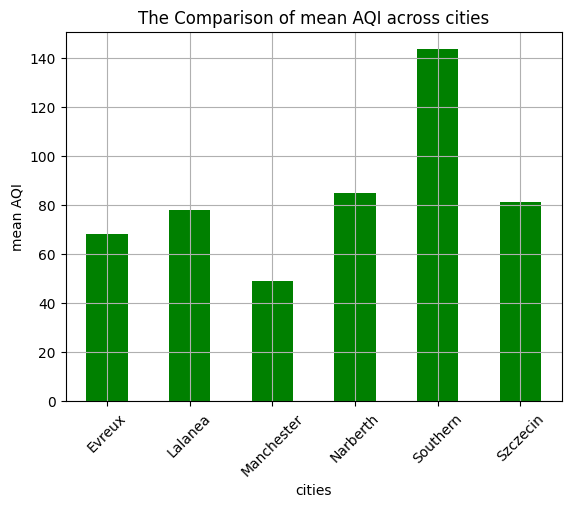

In [108]:
# Rank of cities by Average AQI accross all cities
bars=all_city.groupby('location_name').AQI.mean() # plots the average of AQI for each cities
bars.plot(kind='bar',color='green')
plt.xlabel('cities')
plt.ylabel('mean AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('The Comparison of mean AQI across cities')
plt.show()

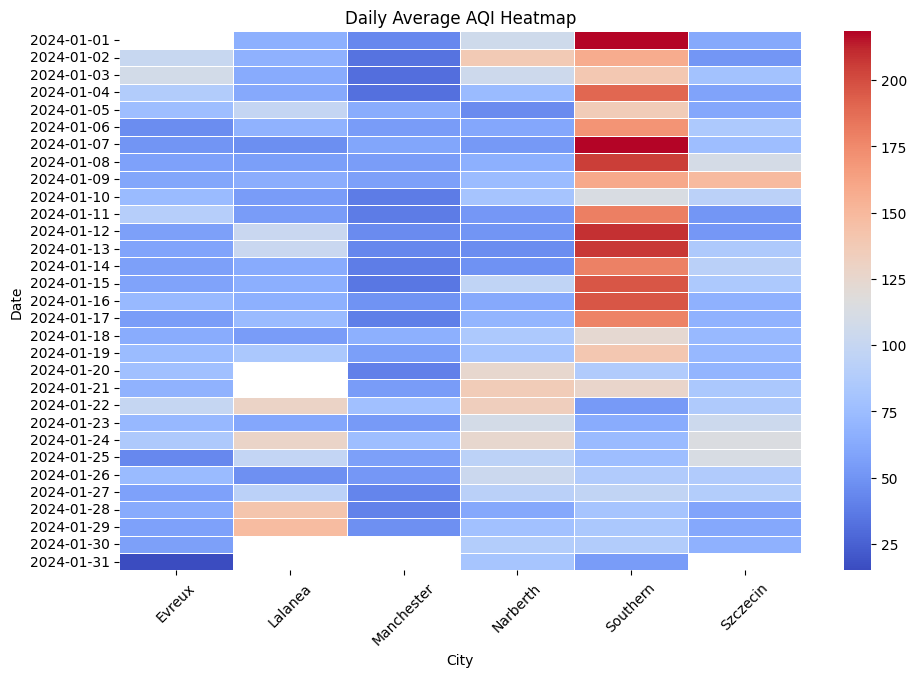

In [110]:
# Calculate daily average AQI for each city in each date with corresponding color for the values
daily_avg_aqi = all_city.groupby([all_city['Date'].dt.date, 'location_name'])['AQI'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(11, 7))
sns.heatmap(daily_avg_aqi, cmap='coolwarm', linecolor='white', linewidths=0.5) # ploting the heat map per dayies

# Set labels and title
plt.xlabel('City')
plt.ylabel('Date')
plt.title('Daily Average AQI Heatmap')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (predictors) as X and target variable as y
X = all_city[['pm25','pm10','o3']] #passing the the concentration
y = all_city['AQI'] # passing the AQI 
# Split data into training and testing sets 20% for test and 80% for training with possible random values for the model 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Use trained model to make predictions
# Example values for pm25, o3, and pm10

new_data = [[36, 62, 120]]  #passing values as input for the model
predicted_aqi_max = model.predict(new_data) #predicting the AQI for the input
print('Predicted AQI_max:', predicted_aqi_max) # displaying the output

Mean Squared Error: 449.5386736790582
R-squared: 0.8199211687826158
Predicted AQI_max: [215.58945824]


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
